## Question 1


- Input $X$
- Weights $H_1$ and $H_2$
- Bias $b_1$ and $b_2$

We compute the following:

$H_1 = \begin{bmatrix} 1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1 \end{bmatrix}$,
$H_2 = \begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix}$

$X = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$Z_1 = XH_1 + b_1$

$b_1 = \begin{bmatrix} 0.15 & 0.15 & 0.15 &0.15 \end{bmatrix}$,
$b_2 =\begin{bmatrix} 0 \end{bmatrix}$


$Z_1 = \begin{bmatrix} 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1 \end{bmatrix} +
\begin{bmatrix} 0.15 \\ 0.15 \\ 0.15 \\0.15\end{bmatrix} =
\begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}
\begin{bmatrix} 0.15 \\ 0.15 \\ 0.15 \\ 0.15 \end{bmatrix} = \begin{bmatrix} 1.15 \\ 0.15 \\ 1.15 \\ 0.15 \end{bmatrix}$


$ A_1 = \tanh(Z_1) $

$A_1 = \begin{bmatrix} 0.81 \\ 0.14 \\ 0.81 \\ 0.14 \end{bmatrix}$

$ Z_2 = H_2A_1 + B_2^T $

$Z_2 = \begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix}\begin{bmatrix} 0.81 \\ 0.14 \\ 0.81 \\ 0.14 \end{bmatrix}+\begin{bmatrix} 0 \end{bmatrix}$


$Z_2 = \begin{bmatrix} 1.187 \end{bmatrix}$

$ A_2 = \tanh(Z_2) $

$ A_2 = 0.83 (rounded-off) $


$MSE = (Y_T-Y_P)^2$

$∂MSE/∂Y_P = -2(Y_T-Y_P)$

$∂tanh(x)/∂x = 1-tanh^2(x) = 1-0.83^2 = 0.31$

$∂MSE/∂Y_P = -2(1-0.83) = -0.34$

$∂MSE/∂H_2 = ∂MSE/∂Y_P \cdot ∂Y_P/∂H_2= -0.34 ⋅ \begin{bmatrix} 0.81 \\ 0.14 \\ 0.81 \\ 0.14 \end{bmatrix}$

$∂H_2new = H_2 - ∂tanh(x)/∂x ⋅ α ⋅ ∂MSE/∂H_2$

$∂H_2new = \begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix} - 0.3111 ⋅ (-0.34\cdot 10) ⋅  \begin{bmatrix} 0.81 \\ 0.14 \\ 0.81 \\ 0.14 \end{bmatrix}$

$∂H_2new = \begin{bmatrix} 1.85 \\ 1.15 \\ 0.85 \\ 1.65 \end{bmatrix}$


$B_2new = 0 - (-0.34)⋅10⋅0.3111  $

$B_2new = 1.05  $



---



# Question 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from nnet import Network, ActivationLayer, FCLayer, mean_squared_error_loss, mse_loss_derivative, tanh, tanh_derivative, binary_cross_entropy, binary_cross_entropy_prime, sigmoid, sigmoid_derivative

Testing the FCLayer and ActivationLayer classes.

In [16]:
# Testing the modified FCLayer class
network1 = Network(loss_function=mean_squared_error_loss, loss_derivative=mse_loss_derivative)
input_size = 2
hidden_layer_size = 3
output_size = 1

H1 = np.array([[1, 0, 1, 0], [0, 1, 0, 1]]).astype(np.float64)
B1 = np.array([0.15, 0.15, 0.15, 0.15]).astype(np.float64)
H2 = np.array([[1, 1, 0, 1.5]]).astype(np.float64)
B2 = np.array([0]).astype(np.float64)

network1.add(FCLayer(weights=H1, bias=B1))
network1.add(ActivationLayer(tanh, tanh_derivative))
network1.add(FCLayer(weights=H2.T, bias=B2))
network1.add(ActivationLayer(tanh, tanh_derivative))

# Training data
x_train = np.array([[1, 0]])
y_train = np.array([[1]])

# Training network
network1.train(x_train, y_train, epochs=1, learning_rate=10)

# After training, get updated weights and biases
updated_H2 = network1.layers[2].weights
updated_B2 = network1.layers[2].bias

print("Updated H2 weights:", updated_H2)
print("Updated B2 bias:", updated_B2)

Epoch 1/1, Loss: 0.028707023414130534
Updated H2 weights: [[1.85946238]
 [1.15647869]
 [0.85946238]
 [1.65647869]]
Updated B2 bias: [[1.05100347]]


The FCLayer class and ActivationLayer work as expected in both forward propogation and backward propogation, as stated below.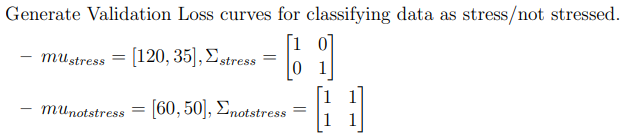

As we can see, the imput and output values are the same as those mentioned in Question 1 of the assignment.


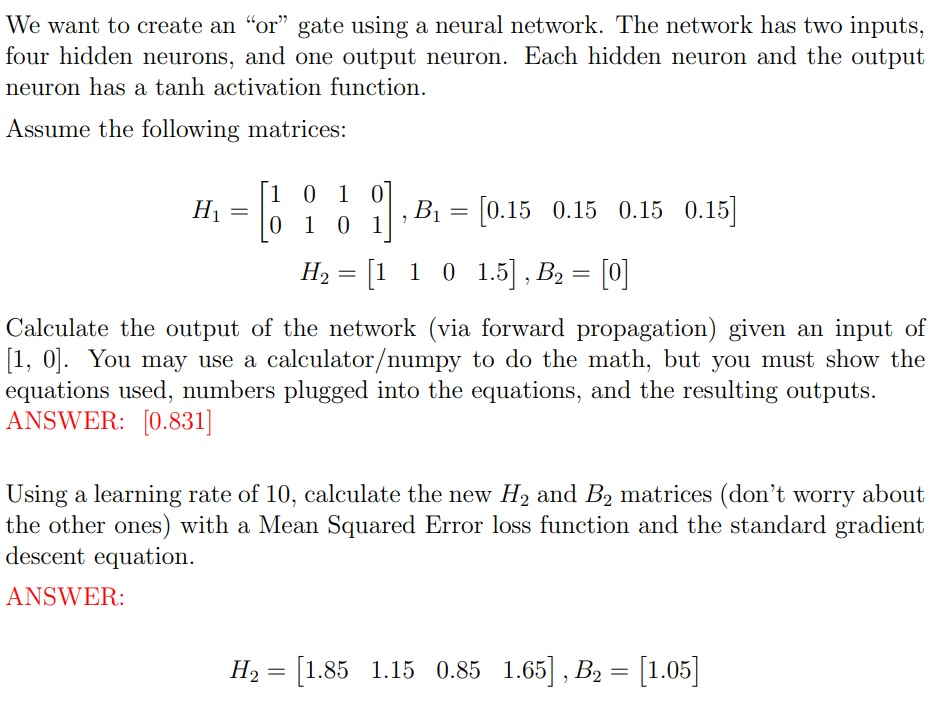

Testing the Classes on EX-or input.

Epoch 1/400, Loss: 17.26958809681289, Validation Loss: 17.26978799617044
Epoch 2/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 3/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 4/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 5/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 6/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 7/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 8/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 9/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 10/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 11/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 12/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 13/400, Loss: 17.26978799617044, Validation Loss: 17.26978799617044
Epoch 14/400, Loss: 17.26978799617044, Validati

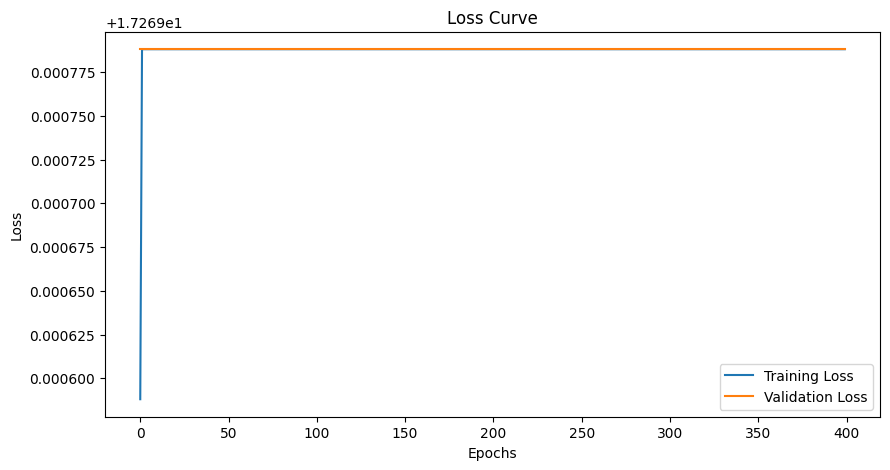

Input: [0 0] Predicted: [[1.]] True: [0]
Input: [0 1] Predicted: [[1.]] True: [1]
Input: [1 0] Predicted: [[1.]] True: [1]
Input: [1 1] Predicted: [[1.]] True: [0]


In [17]:
# XOR gate training data
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# XOR gate validation data, identical to training data in this specific case
x_val = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_val = np.array([[0], [1], [1], [0]])


# Initialize network and add layers as before
network = Network(loss_function=binary_cross_entropy, loss_derivative=binary_cross_entropy_prime)
input_size = 2
hidden_layer_size = 20
output_size = 1

network.add(FCLayer(input_size=input_size, output_size=hidden_layer_size))
network.add(ActivationLayer(tanh, tanh_derivative))
network.add(FCLayer(input_size=hidden_layer_size, output_size=output_size))
network.add(ActivationLayer(tanh, tanh_derivative))

# Training the network with validation data
network.train(x_train, y_train, x_val = x_val, y_val = y_val, epochs=400, learning_rate=0.01)
network.plot_loss()
# Testing the network with XOR data
for x, y in zip(x_train, y_train):
    print(f"Input: {x} Predicted: {network.predict(x)} True: {y}")

As we can see, the model has correctly predicted teh outputs for the Ex-or inputs provided to it. This means that the Network class is functioning as intended.

Testing the model on synthetic data as given in the question.

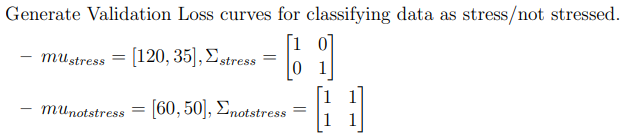

Epoch 1/100, Loss: 0.6955573002775297, Validation Loss: 0.694120408949163
Epoch 2/100, Loss: 0.695138059255395, Validation Loss: 0.6941204105493562
Epoch 3/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 4/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 5/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 6/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 7/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 8/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 9/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 10/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 11/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 12/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 13/100, Loss: 0.6951380593832323, Validation Loss: 0.6941204105493571
Epoch 14/100, Loss: 0.6

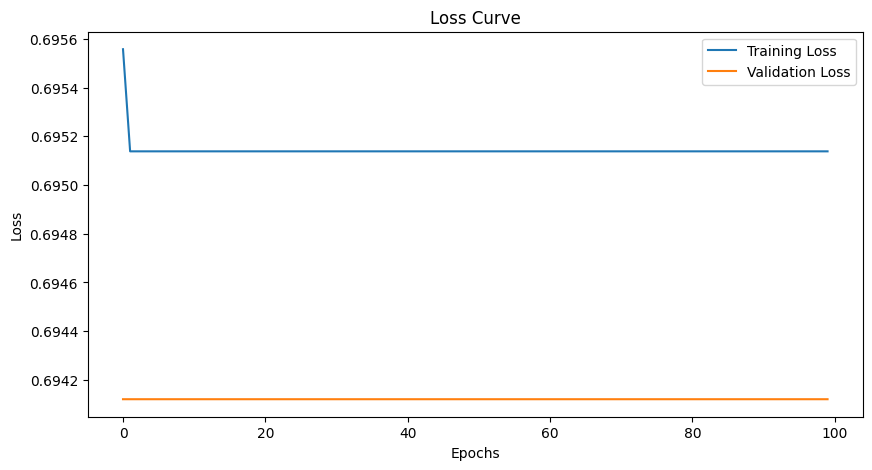

In [18]:
from sklearn.model_selection import train_test_split

# Parameters for generating synthetic data for stressed and not stressed classes
mu_stress = np.array([120, 35])
sigma_stress = np.array([[1, 0], [0, 1]])
mu_notstress = np.array([60, 50])
sigma_notstress = np.array([[1, 1], [1, 1]])

# Generate synthetic data
sample_size = 1000  # Sample size for each class
data_stress = np.random.multivariate_normal(mu_stress, sigma_stress, sample_size)
data_notstress = np.random.multivariate_normal(mu_notstress, sigma_notstress, sample_size)
labels_stress = np.ones(sample_size)
labels_notstress = np.zeros(sample_size)

# Combine the data
X = np.vstack((data_stress, data_notstress))
y = np.concatenate((labels_stress, labels_notstress))

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize network with binary cross-entropy loss and its derivative
network = Network(loss_function=binary_cross_entropy, loss_derivative=binary_cross_entropy_prime)

# Define the neural network structure
input_size = 2  # Two features (dimensions of the data)
hidden_layer_size = 3  # Hidden layer size from the code provided
output_size = 1  # Single output for binary classification

# Adding layers to the network
network.add(FCLayer(input_size=input_size, output_size=hidden_layer_size))
network.add(ActivationLayer(tanh, tanh_derivative))
network.add(FCLayer(input_size=hidden_layer_size, output_size=output_size))
network.add(ActivationLayer(sigmoid, sigmoid_derivative))

# Train the network and plot the validation loss curve
network.train(x_train, y_train, epochs=100, learning_rate=0.01, x_val=x_val, y_val=y_val)

# Plot the loss curves
network.plot_loss()

As we can see, the code is working as it should for all use-cases.



---



# Question 3

(a) Explain how the learning rate impacts the gradient descent algorithm


The learning rate is an important hyperparameter because it determines the size of the steps taken towards the minimum of the loss function. A properly chosen learning rate allows the algorithm to converge efficiently to the optimal solution by adjusting the weights in the direction that minimally decreases the loss. If the learning rate is too large, the algorithm might overshoot the minimum. Conversely, a too-small learning rate results in very small updates to the weights, causing the algorithm to converge very slowly, which can be computationally expensive and inefficient.


(b) Detail how AdaGrad works and why/how RMSprop improves on AdaGrad
(looking for mathematical insights, not just the concept)


AdaGrad (Adaptive Gradient Algorithm) enhances the gradient descent approach by adapting the learning rates for each parameter. It achieves this through the accumulation of the square of the gradients for each parameter. The update rule for the parameters involves dividing the learning rate by the square root of this accumulator, which effectively scales down the learning rate for parameters with large gradients. However, AdaGrad's primary limitation lies in its continuous accumulation of squared gradients, leading to an continously decreasing learning rate that eventually becomes infinitesimally small, causing the training process to prematurely stagnate.

RMSprop addresses this issue by introducing a decay factor to the accumulation process. Instead of accumulating all past squared gradients equally, RMSprop applies a weighted moving average, giving more importance to recent gradients. This prevents the unbounded growth of the accumulator, thereby avoiding the pitfall of diminishing learning rates to the point of ineffectiveness.


(c) Detail how the Adam optimizer works



The Adam optimizer combines the strengths of two other methods: AdaGrad and RMSprop, while introducing momentum into the optimization process. It maintains two moving averages for each parameter, the first is the mean of the gradients, and the second is the uncentered variance of the gradients. Adam calculates an exponentially weighted moving average of the gradients and their squared values to adjust the learning rate dynamically for each parameter. These moving averages are then bias-corrected to counteract their initialization at the origin, providing a more accurate estimate in the early stages of training. This combination of momentum with adaptive learning rate adjustments enables Adam to navigate the optimization landscape more effectively, making it one of the most popular and widely used optimizers in machine learning and deep learning.



(d) Explain the difference between Bagging and Boosting Methods (make sure you
talk about bias/variance and the relationship to decision trees)


Bagging and Boosting are both ensemble techniques used to improve the accuracy and stability of machine learning models, particularly decision trees, by combining the predictions of multiple models. Bagging reduces variance without significantly affecting bias by training multiple models in parallel on bootstrapped subsets of the data and then averaging their predictions. This approach is particularly effective with high-variance, low-bias models, like deep decision trees, as it mitigates their tendency to overfit. Conversely, Boosting sequentially trains models, where each model attempts to correct the errors of its predecessor, effectively reducing bias while keeping variance in check. This is achieved by assigning more weight to misclassified instances by the previous models, thereby focusing subsequent models more on difficult cases. Boosting is typically applied to models with low variance but potentially high bias, such as shallow decision trees.


(e) What is Gradient Boosting and describe how it works


Gradient Boosting is an ensemble technique that iteratively improves a model's accuracy by focusing on correcting its predecessor's errors. Gradient Boosting minimizes a loss function directly. The process begins with a decision tree usually, which makes predictions on the dataset. After each round of prediction, the algorithm computes the gradient of the loss function with respect to the predictions. A new model is then trained not on the original dataset, but on these gradient values. The predictions from this new model are used to update the overall model's predictions, moving them closer to the true target values. This procedure is repeated, with each new model focusing on the residual errors of the ensemble thus far, effectively pushing the entire model ensemble towards the optimal solution.



(f) Explain why neural networks are prone to overfitting


Neural networks are particularly prone to overfitting due to their complex architecture and the number of parameters that they can contain. This complexity allows them to model highly nonlinear relationships and intricate patterns in large datasets, making them powerful tools for a range of tasks. However, this same capability can become a drawback when a network begins to memorize the training data rather than learning the underlying patterns. The overfitting phenomenon occurs when a model captures noise or random fluctuations in the training data as if they were meaningful, leading to a model that performs exceptionally well on training data but poorly on unseen data. The risk of overfitting is exacerbated in scenarios with limited training data or when the data does not represent the full complexity of the problem space.